## AIF-6장 SVM (Support Vector Machine) 분류기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 'svm_data.csv' dataset은 아래와 같은 데이터셋이다.
  - 2차원(2D) 특징: $(x_1, x_2)$
  - 라벨: 3개의 부류 = {0, 1, 2}

- 'svm_data.csv' dataset을 비선형 SVM을 이용해서 분류를 하고자 한다.
  - 사용하는 kernel = {'linear', 'poly', 'rbf', 'sigmoid'}
  


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('drive/MyDrive/AI/Team/svm_data.csv')
df.head()

,x1,x2,y
0,-4.609518,-5.948638,2
1,-3.386182,-4.512298,2
2,-5.196995,-5.287525,2
3,-3.774653,-5.126087,2
4,-4.970512,-5.516426,2


#### (1) dataset을 아래와 같이 시각화를 하여라.

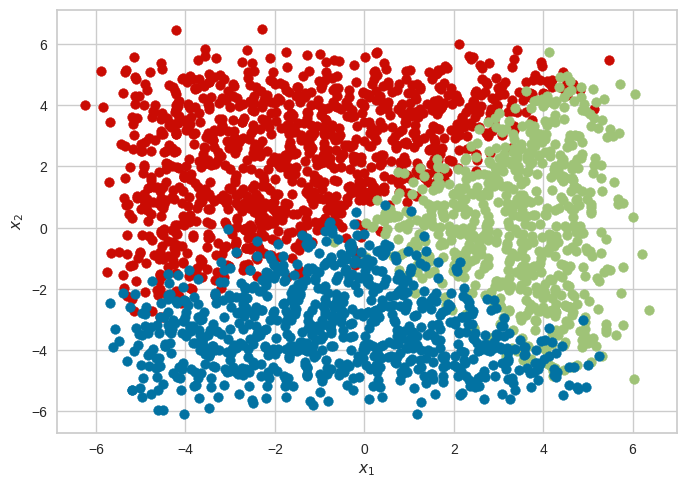

In [ ]:
import matplotlib.pyplot as plt

colors = ['r', 'g', 'b']
for idx in range(df['y'].max() + 1):
  # Write your code here
  subset = df[df['y'] == idx]
  plt.scatter(subset['x1'], subset['x2'], c=colors[idx])

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid('True')

#### (2) 비선형 SVM을 수행하라.

- 각 kernel ( {'linear', 'poly', 'rbf', 'sigmoid'})별로 정확도를 계산하라.
- 이들 kernel 중에서 가장 정확도가 높은 kernel을 선택하라.
  
  참고: 정확도는 SVC.score(X, y) method를 이용해서 구할 수 있음.
- 구한 정확도를 이용해서 bar 그래프를 그려라.

Accuracy by kernel (linear) = 0.922000
Accuracy by kernel (poly) = 0.886800
Accuracy by kernel (rbf) = 0.922800
Accuracy by kernel (sigmoid) = 0.814400
Best performance by "(rbf kernel)" and acucracy = 0.9228


Text(0, 0.5, 'accuracy')

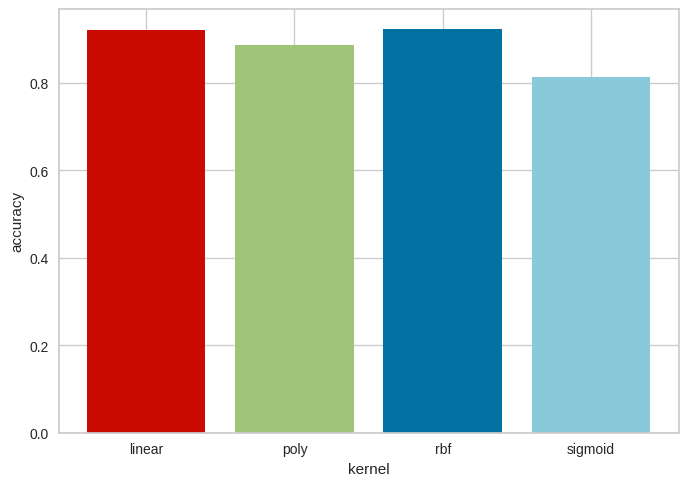

In [ ]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

X = df[['x1', 'x2']].to_numpy()
y = df['y']
accuracy = []
max_acc = 0

# write your code here (C=1을 사용하라.)
best_kernel = None

for kernel in kernels:
  model = SVC(kernel = kernel, C = 1, random_state = 42)
  model.fit(X, y)
  acc = model.score(X, y)
  accuracy.append(acc)
  print(f'Accuracy by kernel ({kernel}) = {acc:f}')
  if acc > max_acc:
    max_acc = acc
    best_kernel = kernel

print('Best performance by "({0} kernel)" and acucracy = {1}'.format(best_kernel, max_acc))

plt.bar(kernels, accuracy, color = ('r', 'g', 'b', 'c'))
plt.xlabel('kernel')
plt.ylabel('accuracy')

#### (3) 가장 높은 정확도를 주는 kernel SVM의 결정경계를 DecisionViz를 이용해서 그려라.

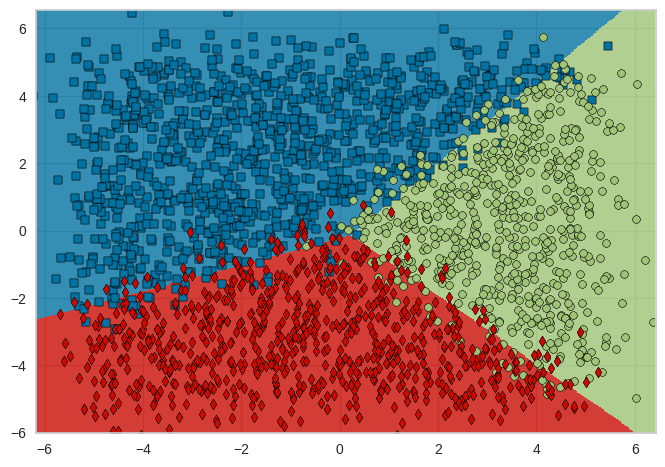

In [ ]:
from sklearn.svm import LinearSVC
from yellowbrick.contrib.classifier import DecisionViz

linear_model = LinearSVC(C=1, random_state=42)
linear_model.fit(X, y)
viz = DecisionViz(linear_model)

viz.fit(X, y)
viz.draw(X, y)
plt.show()


##### (4) 표준화된 dataset에 대해 가장 좋은 성능을 보인 kernel SVM을 수행하여 정확도를 구하라. 이때 Pipeline을 이용하라.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# write your code here

SVC_STD = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel=best_kernel, C=1, random_state=42))
])


SVC_STD.fit(X, y)
acc = SVC_STD.score(X, y)
print('accuracy = ', acc)

accuracy =  0.9228



#### (5) 선형 SVM을 수행하라.

학습된 LinearSVC는 아래와 같은 관계가 있다.

- $\mathbf{W}$ = lsvc.coef_,  $3 \times 2$

- $\mathbf{b}$ = lsvc.intercept_ $ 3 \times 1$

- decision_function ($\mathbf{x}$) = $\mathbf{d}$ =  $\mathbf{Wx + b} = [d_1, d_2, d_3] $, $3 \times 1$, where $\mathbf{x}$: sample, $2 \times 1$

- prediction($\mathbf{x}$) = $\underset{i}{\text{argmax  }}  d_i$
- loss는 hinge

학습된 LinearSVC를 이용해서 $\mathbf{x}$는 X[0:3]의 3개의 sample들에 대해 다음을 계산해서 보여라.

- LinearSVC.decision_function($\mathbf{x}$)과 $\mathbf{d}$ =  $\mathbf{Wx + b}$가 같음을 보여라.

- LinearSVC.prediction($\mathbf{x}$)과  $\underset{i}{\text{argmax  }}  d_i$가 같음을 보여라.

   


In [ ]:
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np

df = pd.read_csv('drive/MyDrive/AI/Team/svm_data.csv')
X = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()

lsvc = LinearSVC(C=1, loss='hinge')
lsvc.fit(X, y)
W = lsvc.coef_
b = lsvc.intercept_
print('(1): 정확도 = {0:.4f}'.format(lsvc.score(X, y)))
print('(2) W = \n', W)
print('(3) b = \n', b)
print('(4): W.shape = ', lsvc.coef_.shape)
print('(5): b.shape = ', lsvc.intercept_.shape)
print('(6) LinearSVC.decision_function & predict')
for idx in range(3):
  dec_f = lsvc.decision_function(X[idx:idx+1])
  pred = lsvc.predict(X[idx:idx+1])
  print('dec: {0}, class = {1}'.format(dec_f, pred))

print('\n(7) W*x + b and argmax (W*x+b)')
# write your code here
for idx in range(3):
    x_sample = X[idx:idx+1].T

    d = np.dot(W, x_sample).flatten() + b
    print(f"W*x + b =  {d}, class =  {np.argmax(d)}")


print('\n\n')


(1): 정확도 = 0.9220
(2) W = 
 [[-1.24722589  1.63976049]
 [ 0.73358132  0.01315858]
 [-0.22749755 -0.89834301]]
(3) b = 
 [-1.10626616 -1.84714341 -1.68176238]
(4): W.shape =  (3, 2)
(5): b.shape =  (3,)
(6) LinearSVC.decision_function & predict
dec: [[-5.11149853 -5.30687521  4.71080943]], class = [2]
dec: [[-4.2820208  -4.39055852  3.14217715]], class = [2]
dec: [[-3.29471518 -5.72913783  4.25055257]], class = [2]

(7) W*x + b and argmax (W*x+b)
W*x + b =  [-5.11149853 -5.30687521  4.71080943], class =  2
W*x + b =  [-4.2820208  -4.39055852  3.14217715], class =  2
W*x + b =  [-3.29471518 -5.72913783  4.25055257], class =  2





/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
